**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.


## Input Data Exploration 

The Vehicle and Non-Vehicle image data were downloaded as specified in the project description. Few random images were plotted from both the classes as shown below. The dataset consisted of 8792 images of vehicles and 8968 images of non-vehicles. Each image has dimension of 64x64 pixels.  

Number of Vehicle Images -  8792
Number of Non-Vehicle Images -  8968


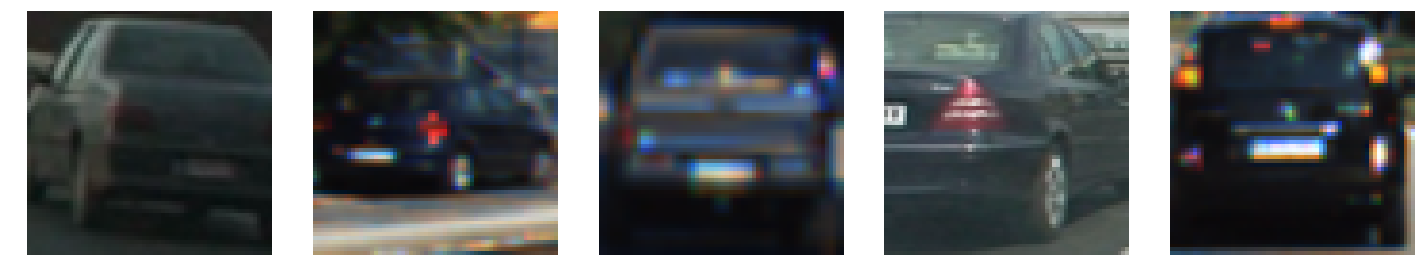

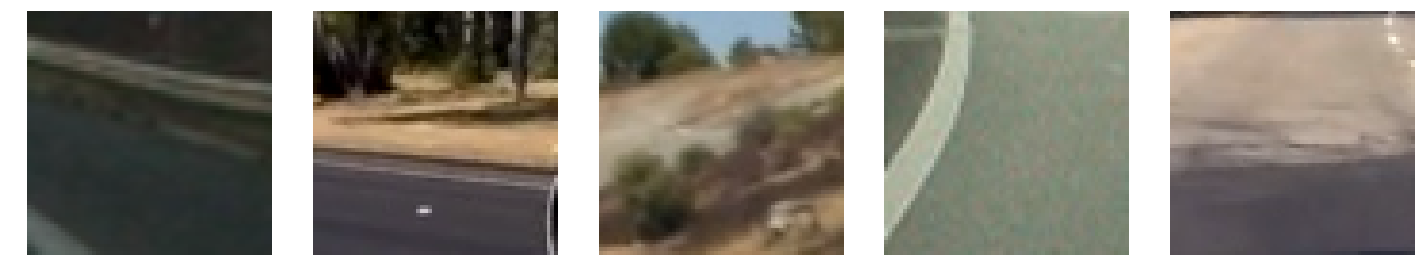

In [11]:
# clear all the variables used
%reset -f
%run vehicle_detector.py
%matplotlib inline

def plot_vehicle_images(image_provider_obj):
    num_vehicle_images = image_provider_obj.get_num_vehicle_images()
    index_list = random.sample(range(num_vehicle_images), 5)
    f, ax = plt.subplots(1, len(index_list), figsize=(20, 9))
    f.tight_layout()
    for ax_run, each_ax in enumerate(ax):
        cur_index = index_list[ax_run]
        cur_image = image_provider_obj.get_vehicle_image(cur_index)
        each_ax.imshow(cur_image)
        each_ax.axis("off")

def plot_non_vehicle_images(image_provider_obj):
    num_non_vehicle_images = image_provider_obj.get_num_non_vehicle_images()
    index_list = random.sample(range(num_non_vehicle_images), 5)
    f, ax = plt.subplots(1, len(index_list), figsize=(20, 9))
    f.tight_layout()
    for ax_run, each_ax in enumerate(ax):
        cur_index = index_list[ax_run]
        cur_image = image_provider_obj.get_non_vehicle_image(cur_index)
        each_ax.imshow(cur_image)
        each_ax.axis("off")

DATA_FOLDER_LOC = path.join(path.abspath('.'), 'data')
image_provider_obj = InputDataProvider(DATA_FOLDER_LOC)
# plots random vehicle and non vehicle images
plot_vehicle_images(image_provider_obj)
plot_non_vehicle_images(image_provider_obj)
print('Number of Vehicle Images - ', str(image_provider_obj.get_num_vehicle_images()))
print('Number of Non-Vehicle Images - ', str(image_provider_obj.get_num_non_vehicle_images()))


## Exploring color spaces (Vehicle Vs Non Vehicle images)

The next was to define the features to represent the input data. For determining the features, image representation in other colour spaces was analysed. Also calculated the histograms for each channel in these color spaces. The results are shown below for RGB, LAB,HLS and YCrCb.

 

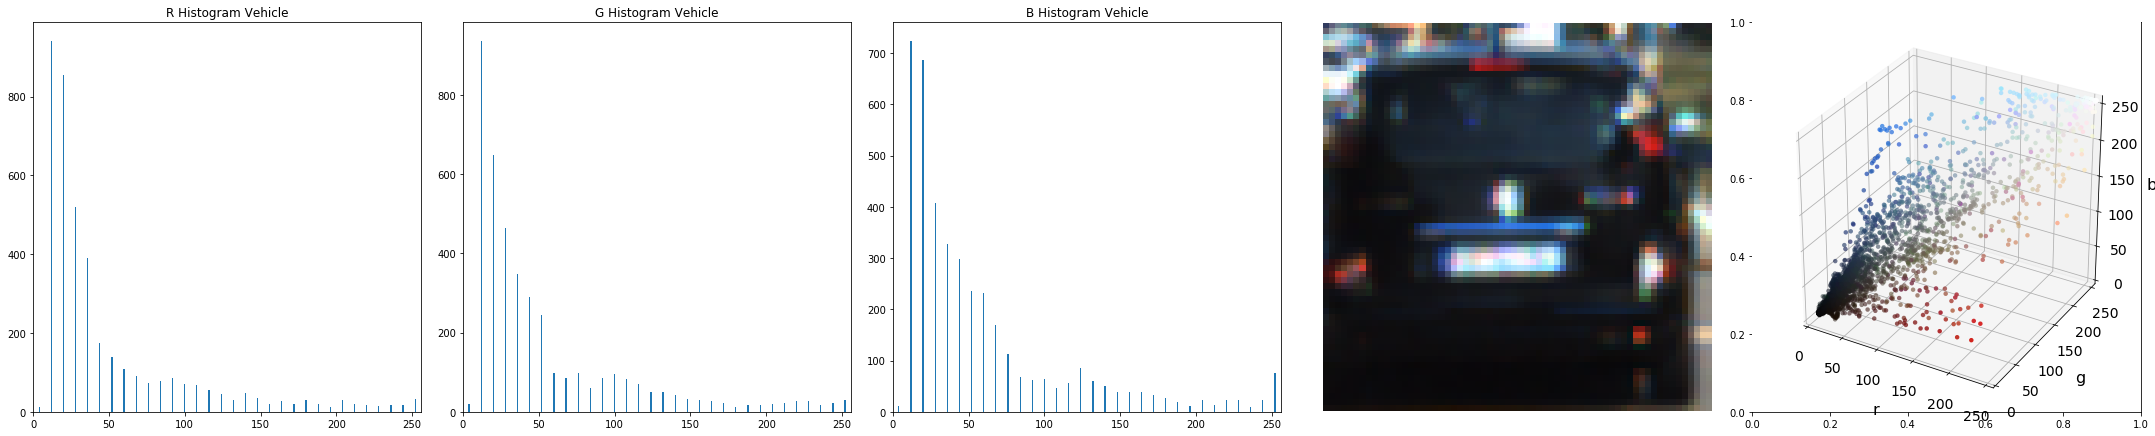

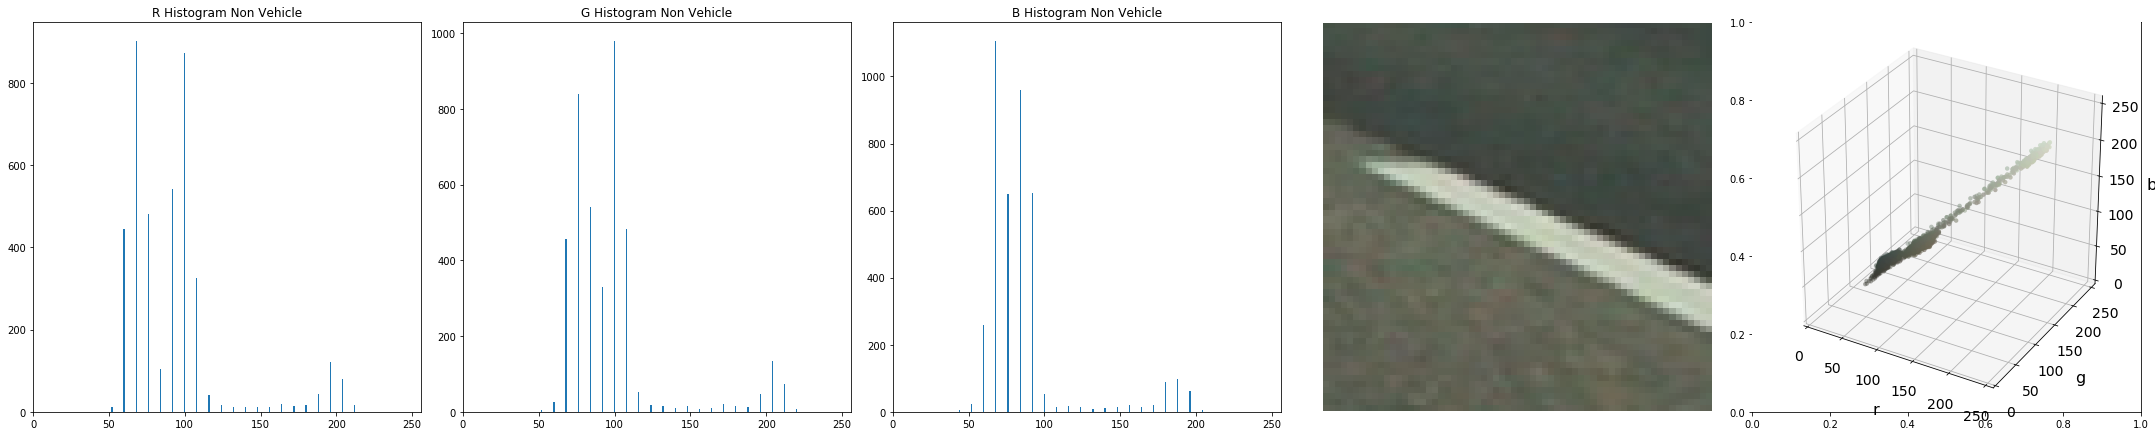

In [20]:
# clear all the variables used
%reset -f
%run vehicle_detector.py
%matplotlib inline

# RGB space
def plot_histogram(image, colorspace, chan_1_title, chan_2_title, chan_3_title):
    # Plot a figure with all three bar charts
    mod_image = convert_color_space(image, colorspace)
    chan_1_hist, chan_2_hist, chan_3_hist = get_histogram_features(mod_image)
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 6))
    f.tight_layout()
    # plot 1
    bin_edges = chan_1_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    ax1.bar(bin_centers, chan_1_hist[0])
    ax1.set_xlim(0, 256)
    ax1.set_title(chan_1_title)   
    # plot 2
    bin_edges = chan_2_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    ax2.bar(bin_centers, chan_2_hist[0])
    ax2.set_xlim(0, 256)
    ax2.set_title(chan_2_title)
    # plot 3
    bin_edges = chan_3_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    ax3.bar(bin_centers, chan_3_hist[0])
    ax3.set_xlim(0, 256)
    ax3.set_title(chan_3_title)
    # plot 4
    ax4.imshow(image)
    ax4.axis("off")
    # plot 5
    mod_image = convert_color_space(image, colorspace)
    colors_rgb = mod_image / 255.  # scaled to [0, 1], only for plotting
    # Set axis limits
    ax5 = f.add_subplot(1, 5, 5, projection='3d')
    ax5.set_xlim((0, 255))
    ax5.set_ylim((0, 255))
    ax5.set_zlim3d((0, 255))
    # Set axis labels and sizes
    ax5.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax5.set_xlabel(colorspace[0], fontsize=16, labelpad=16)
    ax5.set_ylabel(colorspace[1], fontsize=16, labelpad=16)
    ax5.set_zlabel(colorspace[2], fontsize=16, labelpad=16)
    # Plot pixel values with colors given in colors_rgb
    ax5.scatter(mod_image[:, :, 0].ravel(),
                mod_image[:, :, 1].ravel(),
                mod_image[:, :, 2].ravel(),
                c=colors_rgb.reshape((-1, 3)), edgecolors='none')
    
DATA_FOLDER_LOC = path.join(path.abspath('.'), 'data')
image_provider_obj = InputDataProvider(DATA_FOLDER_LOC)
# plots random vehicle and non vehicle images
num_vehicle_images = image_provider_obj.get_num_vehicle_images()
num_non_vehicle_images = image_provider_obj.get_num_non_vehicle_images()
select_vehicle_index =  random.sample(range(num_vehicle_images), 1)
select_non_vehicle_index =  random.sample(range(num_vehicle_images), 1)
vehicle_image = image_provider_obj.get_vehicle_image(select_vehicle_index[0])
non_vehicle_image = image_provider_obj.get_non_vehicle_image(select_non_vehicle_index[0])
plot_histogram(vehicle_image, 'rgb', 'R Histogram Vehicle', 'G Histogram Vehicle', 'B Histogram Vehicle')
plot_histogram(non_vehicle_image, 'rgb', 'R Histogram Non Vehicle', 'G Histogram Non Vehicle', 'B Histogram Non Vehicle')

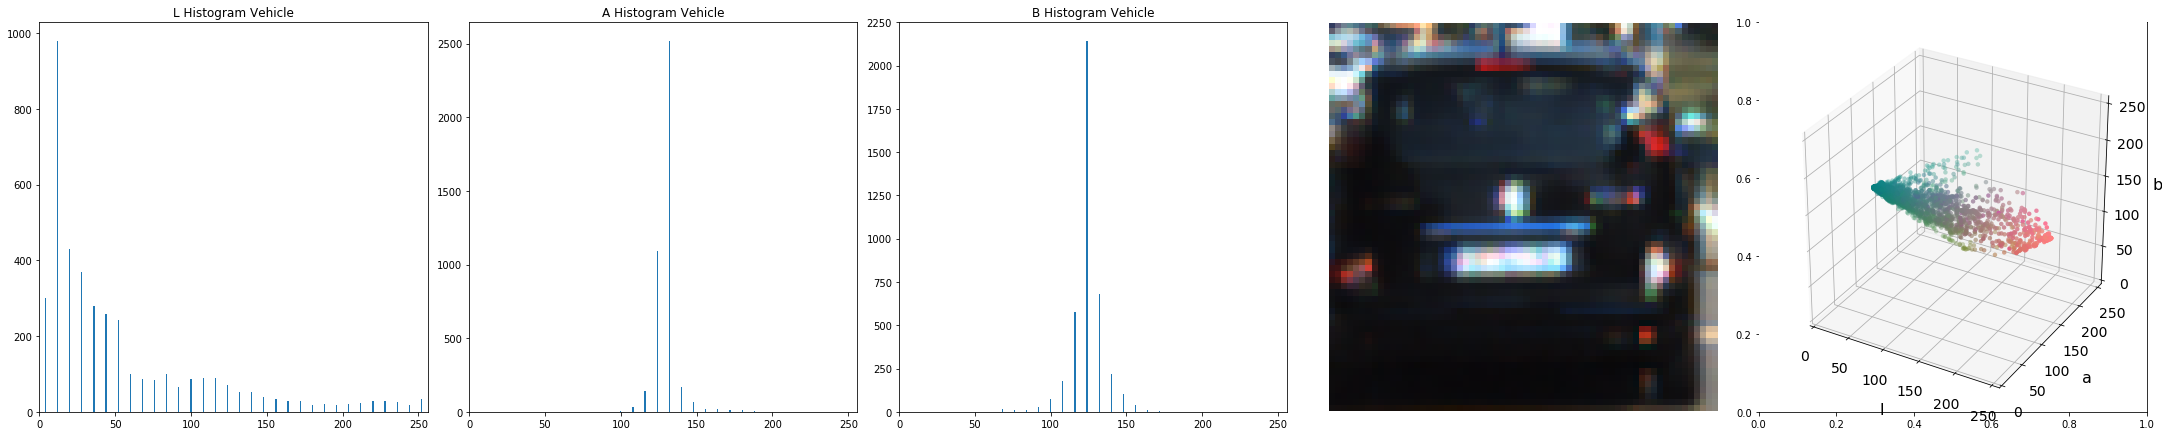

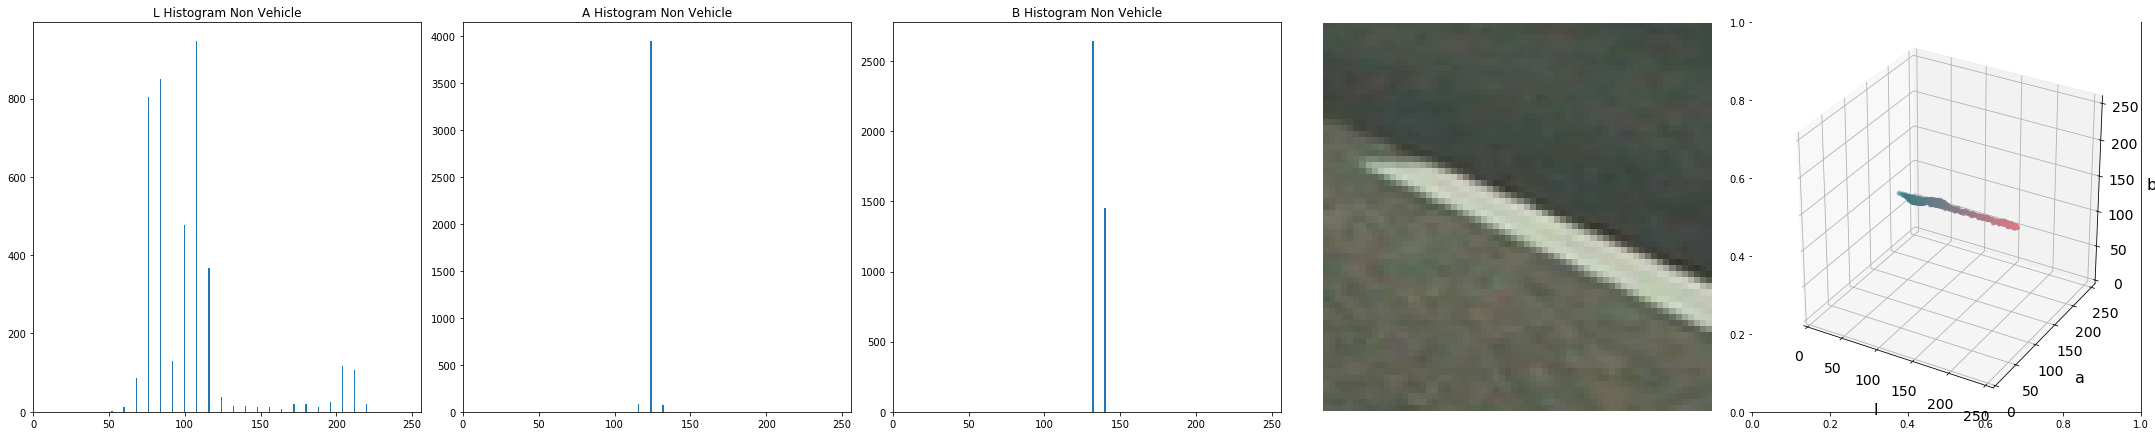

In [21]:
# Lab
plot_histogram(vehicle_image, 'lab', 'L Histogram Vehicle', 'A Histogram Vehicle', 'B Histogram Vehicle')
plot_histogram(non_vehicle_image, 'lab', 'L Histogram Non Vehicle', 'A Histogram Non Vehicle', 'B Histogram Non Vehicle')

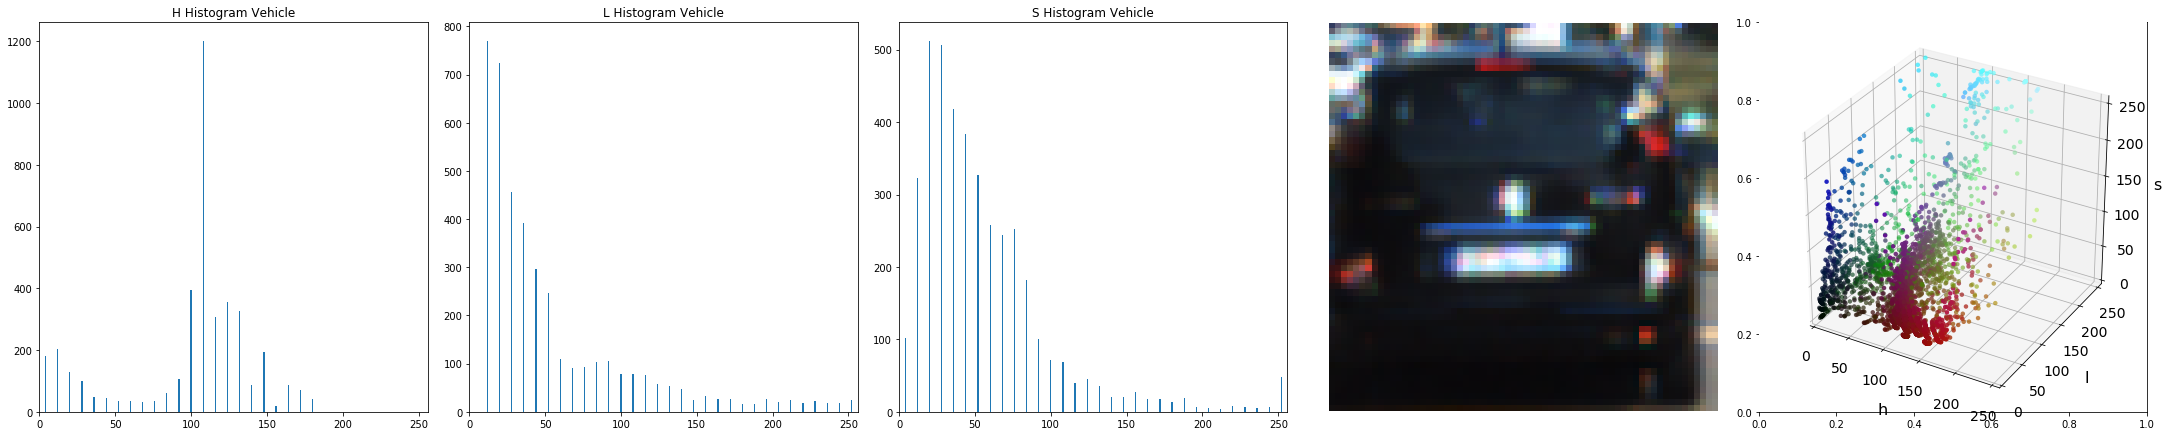

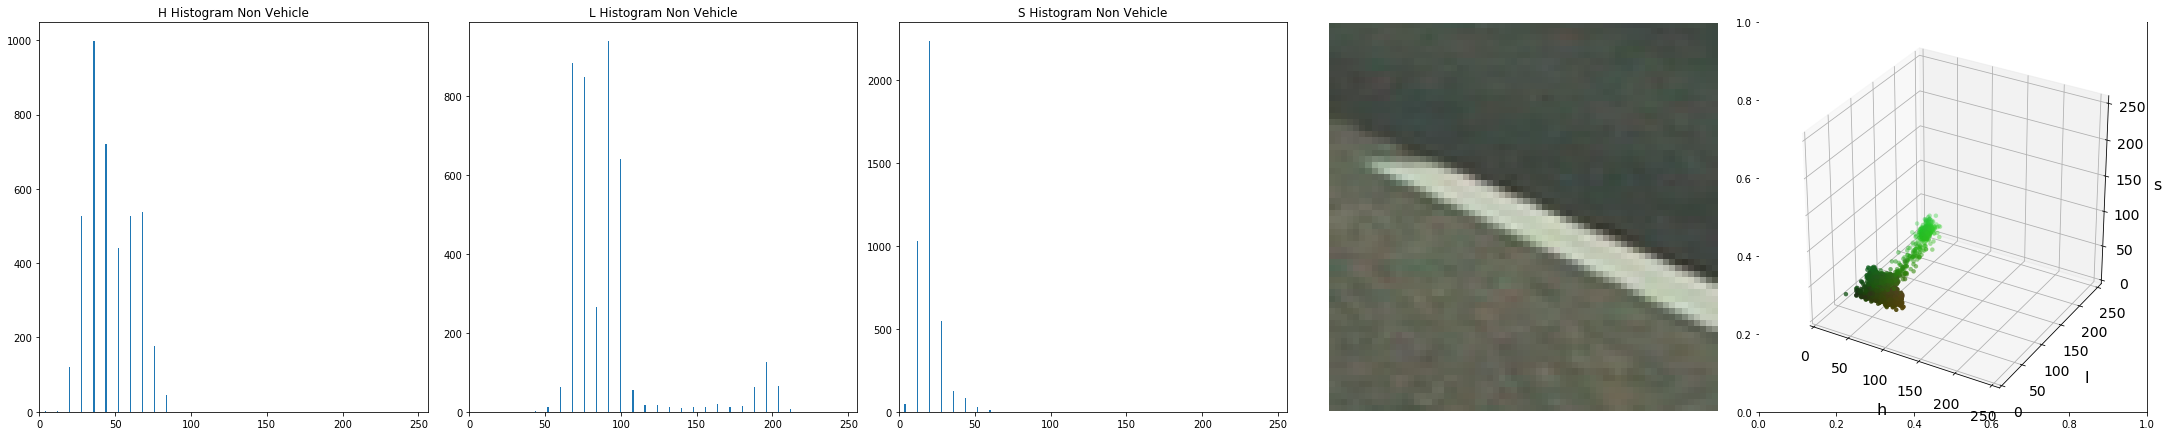

In [22]:
# HLS
plot_histogram(vehicle_image, 'hls', 'H Histogram Vehicle', 'L Histogram Vehicle', 'S Histogram Vehicle')
plot_histogram(non_vehicle_image, 'hls', 'H Histogram Non Vehicle', 'L Histogram Non Vehicle', 'S Histogram Non Vehicle')

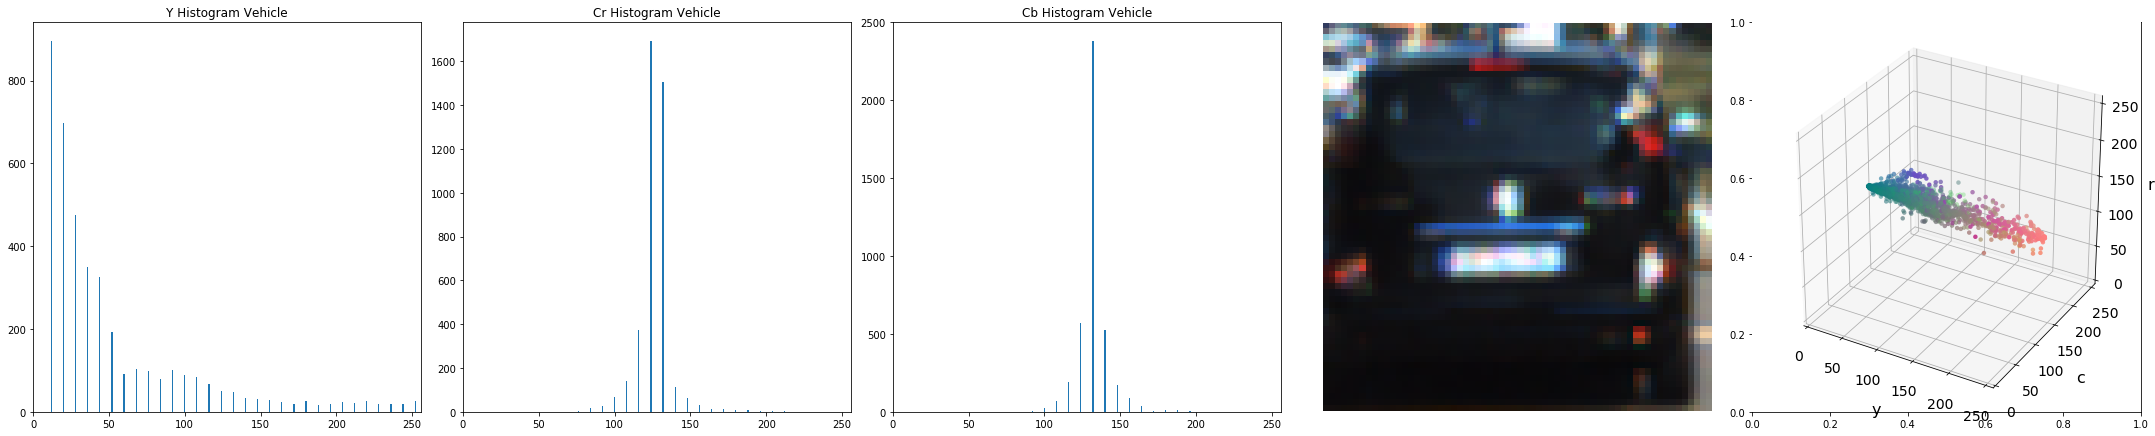

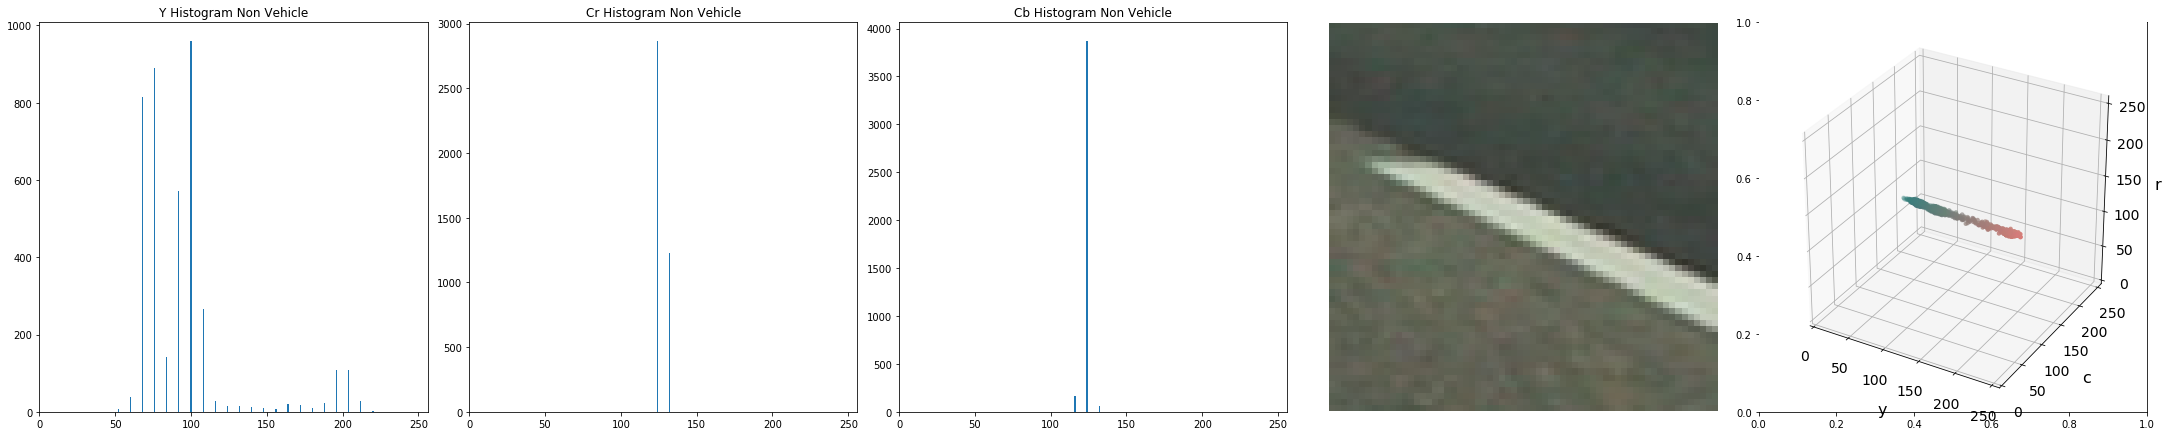

In [23]:
# YCrCb
plot_histogram(vehicle_image, 'ycrcb', 'Y Histogram Vehicle', 'Cr Histogram Vehicle', 'Cb Histogram Vehicle')
plot_histogram(non_vehicle_image, 'ycrcb', 'Y Histogram Non Vehicle', 'Cr Histogram Non Vehicle', 'Cb Histogram Non Vehicle')

## HOG Features

HOG features were also generated to differentiate between vehicle class and non-vehicle class. The parameters for generation of HOG features were kept as follows
* Orientation = 9
* Pixels Per Cell = 8
* Cell per Block = 2

These values were selected based on computer vision literature.  The HOG feature is implemented in function 'get_hog_features' in the file 'vehicle_detector.py'. The following figure displays the HOG image for both the classes in LAB colour space.

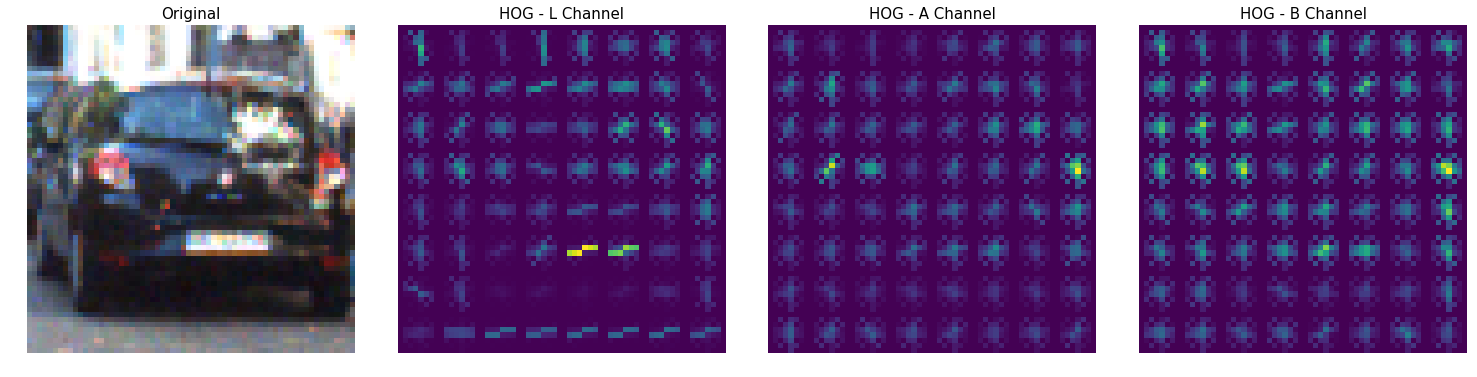

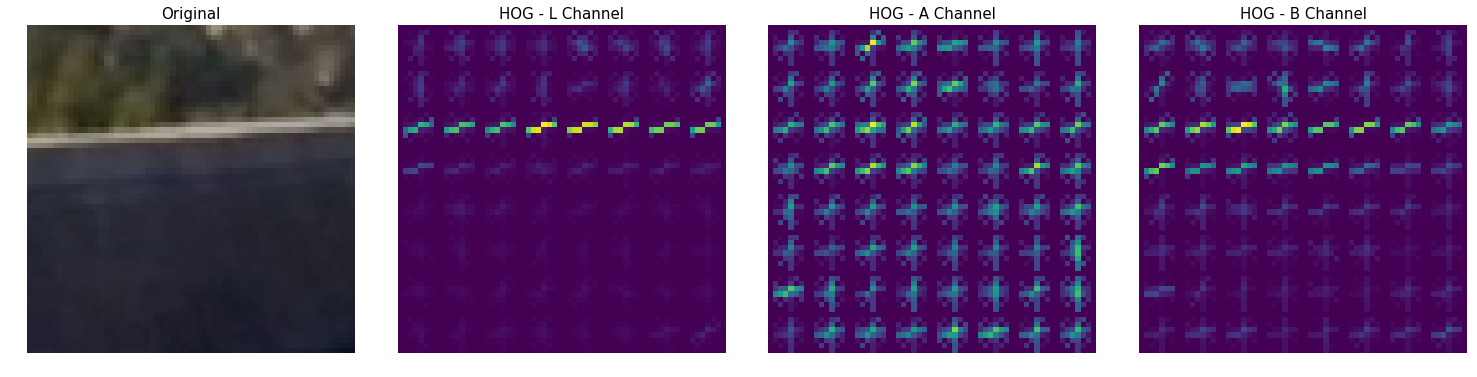

In [15]:
# clear all the variables used
%reset -f
%run vehicle_detector.py
%matplotlib inline
def plot_hog_images(org_image, l_hog, a_hog, b_hog ):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(org_image)
    ax1.set_title('Original', fontsize=15)
    ax1.axis("off")
    ax2.imshow(l_hog)
    ax2.set_title('HOG - L Channel', fontsize=15)
    ax2.axis("off")
    ax3.imshow(a_hog)
    ax3.set_title('HOG - A Channel', fontsize=15)
    ax3.axis("off")
    ax4.imshow(b_hog)
    ax4.axis("off")
    ax4.set_title('HOG - B Channel', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

DATA_FOLDER_LOC = path.join(path.abspath('.'), 'data')
image_provider_obj = InputDataProvider(DATA_FOLDER_LOC)
# plots random vehicle and non vehicle images
num_vehicle_images = image_provider_obj.get_num_vehicle_images()
num_non_vehicle_images = image_provider_obj.get_num_non_vehicle_images()
select_vehicle_index =  random.sample(range(num_vehicle_images), 1)
select_non_vehicle_index =  random.sample(range(num_vehicle_images), 1)
vehicle_image = image_provider_obj.get_vehicle_image(select_vehicle_index[0])
non_vehicle_image = image_provider_obj.get_non_vehicle_image(select_non_vehicle_index[0])
mod_vehicle_image = convert_color_space(vehicle_image, 'lab')
mod_non_vehicle_image = convert_color_space(non_vehicle_image, 'lab')
orient=9
pix_per_cell=8
cell_per_block=2
l,a,b= cv2.split(mod_vehicle_image)
l_hog_feature, l_hog_image = get_hog_features(l, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
a_hog_feature, a_hog_image = get_hog_features(a, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
b_hog_feature, b_hog_image = get_hog_features(b, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
plot_hog_images(vehicle_image, l_hog_image, a_hog_image, b_hog_image)

l,a,b= cv2.split(mod_non_vehicle_image)
l_hog_feature, l_hog_image = get_hog_features(l, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
a_hog_feature, a_hog_image = get_hog_features(a, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
b_hog_feature, b_hog_image = get_hog_features(b, orient, pix_per_cell, cell_per_block, 
                                             vis=True, feature_vec=True) 
plot_hog_images(non_vehicle_image, l_hog_image, a_hog_image, b_hog_image)

## Training the Linear SVM Classifier

The final feature consists of the following
* Spatial binning features (Spatial Bin Size = 32)
* Histogram Features (Number of bins 32, Histogram  Range - (0,256))
* HOG feature for all the channels (Orientation = 9, Pixels Per Cell = 8, Cell per Block = 2)
Initially, each image is converted to LAB colour space and above features are calculated on after the other. Then these values are concatenated to form a one-dimensional array with size of 8460 elements. The generation of the complete feature is implemented in function 'extract_image_feature' in file 'vehicle_detector.py'

Now the each image in the training data is converted into feature space. Thus we obtain an input array of size (17760,8460).
The corresponding output label array is also generated.

The training data was split into train and validation data set using the sklearn function 'train_test_split'. Using the training and validation data set, we train a linear SVM. Various values for Penalty parameter C of the error term were evaluated. The SVM model with highest validation accuracy was chosen to classify vehicle and non-vehicle classes.

In [4]:
# clear all the variables used
%reset -f
%run vehicle_detector.py
%matplotlib inline
DATA_FOLDER_LOC = path.join(path.abspath('.'), 'data')
TRAIN_PARAMS_LOC = path.join(path.abspath('.'), 'trainParams.npz')
image_provider_obj = InputDataProvider(DATA_FOLDER_LOC)
num_vehicle_images = image_provider_obj.get_num_vehicle_images()
num_non_vehicle_images = image_provider_obj.get_num_non_vehicle_images()
# constants
spatial = 32
hist_bins = 32
hist_range=(0, 256)
orient=9
pix_per_cell=8
cell_per_block=2
cspace = 'lab'
x_start_stop = [300, None]
y_start_stop = [400, 600]
xy_scales=[(96, 96), (128, 128)]
xy_overlap=(0.75, 0.75)
heat_map_threshold = 5

if path.exists(TRAIN_PARAMS_LOC):
    # Define the labels vector
    print('Loaded the saved Parameters')
    data = np.load(TRAIN_PARAMS_LOC)
    X = data['X']
    y = data['y']
    C_Values = data['C_Values']
    best_c_value = data['best_c_value']
    best_accuracy = data['best_accuracy']
    training_accuracies = data['training_accuracies']
    validation_accuracies = data['validation_accuracies']
    best_random_state = data['best_random_state']
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    print('Input Dimension - ', str(scaled_X.shape))
else:
    car_features = extract_features_for_data_set(range(num_vehicle_images), image_provider_obj,
                                                 'vehicle', cspace, (spatial, spatial), hist_bins, 
                                                 hist_range, orient, pix_per_cell,
                                                 cell_per_block)
    not_car_features = extract_features_for_data_set(range(num_non_vehicle_images), image_provider_obj, 
                                                     'non-vehicle', cspace, (spatial, spatial),
                                                     hist_bins, hist_range, orient, pix_per_cell,
                                                     cell_per_block)

    # Create an array stack of feature vectors
    X = np.vstack((car_features, not_car_features)).astype(np.float64)                        
    # Define the labels vector
    y = np.hstack((np.ones(num_vehicle_images), np.zeros(num_non_vehicle_images)))
    # Training
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    print('Input Dimension - ', str(scaled_X.shape))
    C_Values = np.logspace(-5, 0, 10)
    training_accuracies = []
    validation_accuracies = []
    best_c_value = 0
    best_accuracy = 0
    best_random_state = 0
    # Split up data into randomized training and test sets
    for each_c_value in  C_Values:
        rand_state = np.random.randint(0, 100)
        X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.4, random_state=rand_state)
        # Now train the Svm
        vehicle_detector_svm = LinearSVC(C=each_c_value,
                                         random_state=rand_state)
        #print(vehicle_detector_svm)
        vehicle_detector_svm.fit(X_train, y_train)
        train_accuracy = vehicle_detector_svm.score(X_train, y_train)
        valid_accuracy = vehicle_detector_svm.score(X_test, y_test)
        print('Validation accuracy - ', str(valid_accuracy),
              ' Training Accuracy - ', str(train_accuracy),
              ' C value - ', str(each_c_value))
        if best_accuracy < valid_accuracy:
            best_accuracy = valid_accuracy
            best_c_value = each_c_value
            best_random_state = rand_state
        validation_accuracies.append(valid_accuracy)
        training_accuracies.append(train_accuracy)
    print(best_c_value)
    print('training done')
    np.savez(TRAIN_PARAMS_LOC, X=X, y=y, C_Values=C_Values, best_c_value=best_c_value, best_accuracy=best_accuracy,
             training_accuracies=training_accuracies, validation_accuracies=validation_accuracies,
             best_random_state=best_random_state)
    print('Saved the Parameters')

vehicle_detector_svm = LinearSVC(C=float(best_c_value), 
                                 random_state=int(best_random_state))
vehicle_detector_svm.fit(scaled_X, y)
vd_detect = VehicleDetector(vehicle_detector_svm, X_scaler, cspace, (spatial, spatial),
                            hist_bins, hist_range, orient, pix_per_cell, cell_per_block, 
                            x_start_stop,y_start_stop, xy_scales, xy_overlap, heat_map_threshold)
print(vehicle_detector_svm)
print('SVM Configured')

Input Dimension -  (17760, 8460)
Validation accuracy -  0.989864864865  Training Accuracy -  0.992586336336  C value -  1e-05
Validation accuracy -  0.992398648649  Training Accuracy -  0.996996996997  C value -  3.5938136638e-05
Validation accuracy -  0.991835585586  Training Accuracy -  0.999718468468  C value -  0.000129154966501
Validation accuracy -  0.993524774775  Training Accuracy -  1.0  C value -  0.000464158883361
Validation accuracy -  0.993384009009  Training Accuracy -  1.0  C value -  0.0016681005372
Validation accuracy -  0.991835585586  Training Accuracy -  1.0  C value -  0.00599484250319
Validation accuracy -  0.991554054054  Training Accuracy -  1.0  C value -  0.0215443469003
Validation accuracy -  0.991554054054  Training Accuracy -  1.0  C value -  0.0774263682681
Validation accuracy -  0.992820945946  Training Accuracy -  1.0  C value -  0.278255940221
Validation accuracy -  0.993243243243  Training Accuracy -  1.0  C value -  1.0
0.000464158883361
training done

## Sliding Window

In order to find out the position and presence of the vehicle in an image, we use sliding window method. I have used two scales
* (96,96)
* (128,128)

We harvest windows of size (96,96) and (128,128) from ceratin section of the image as shown in the figure below. We neglect other areas because there is no probability to find vehicles in other areas. The parmeters for harvesting the windows is as follows:
* x_start_stop = [300, None]
* y_start_stop = [400, 600]
* xy_scales=[(96, 96), (128, 128)]
* xy_overlap=(0.75, 0.75)

These harvested windows
* Resized in (64,64)
* Converted into feature space (as described in the previous section)
* Generates a one-dimensional vector of size 8460.
* Using the generated feature values, the trained SVM predicts the presence or absence of a vehicle in the image.
* In order to solve the problem of multiple detections and false positive detections, we generate a heat map using the predictions of trained SVM and is shown in the figure below. (Implementation in function 'generate_heat_map' in file vehicle_detector.py)
* Also a threshold is applied to neglect false positive detections.
* In case of video processing heat map is summed over last 5 frames, so that one erroneous detection does not spoil the complete pipeline.


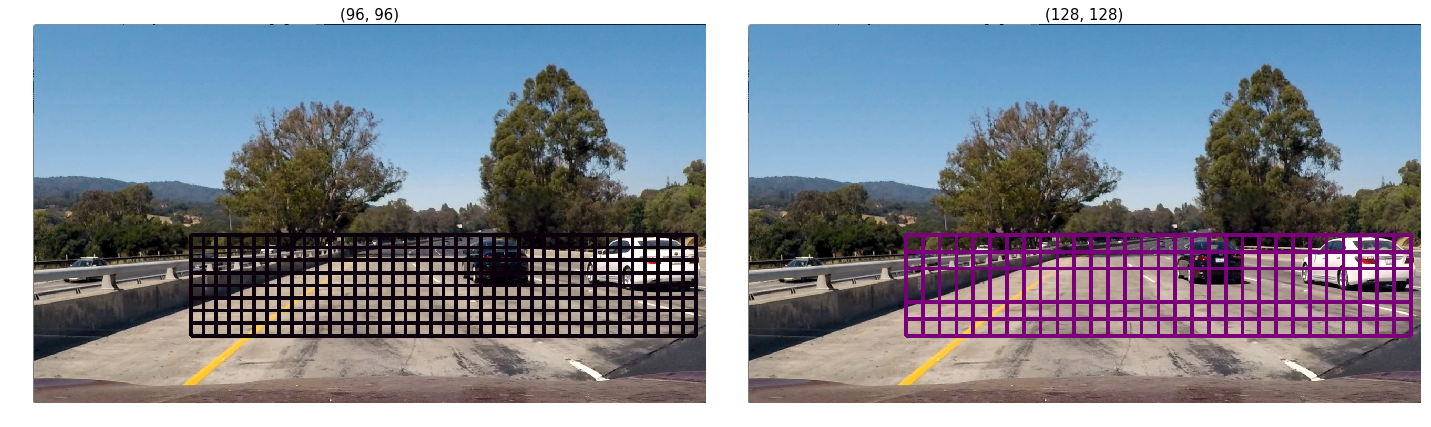

In [2]:
# Sliding windows
test_image = cv2.cvtColor(cv2.imread(path.join(path.abspath('.'), 'test_images', 'test1.jpg')), cv2.COLOR_BGR2RGB)
f, ax = plt.subplots(1, len(xy_scales), figsize=(20, 9))
f.tight_layout()
for ax_run, each_ax in enumerate(ax):
    rand_color = np.random.randint(0, 255)
    windows = slide_window(test_image, x_start_stop, y_start_stop, xy_scales[ax_run], xy_overlap)
    each_ax.imshow(draw_boxes(test_image, windows, (rand_color, 0, rand_color)))
    each_ax.set_title(str(xy_scales[ax_run]), fontsize=15)
    each_ax.axis("off")


## Test Images

The pipeline is evaluated over the test images and results are displayed below.

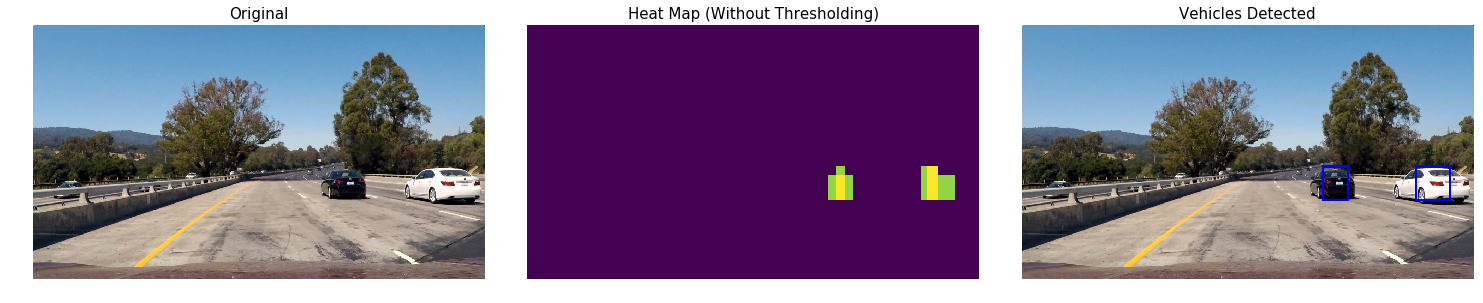

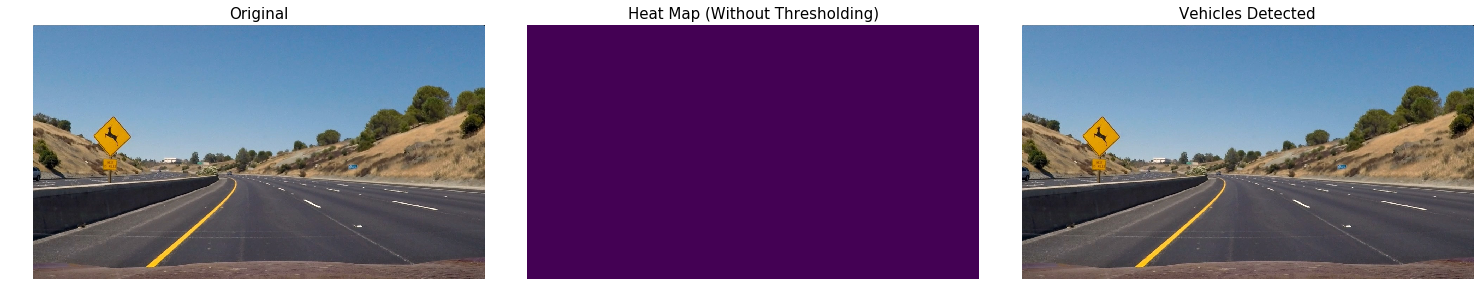

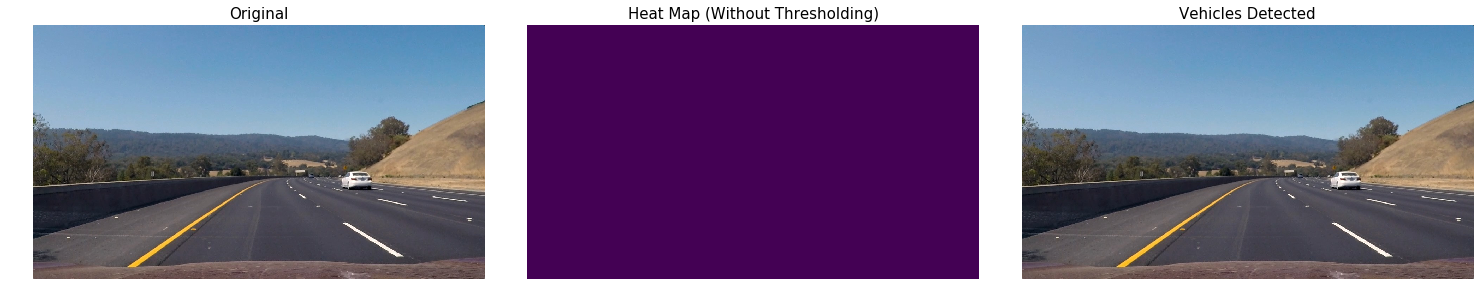

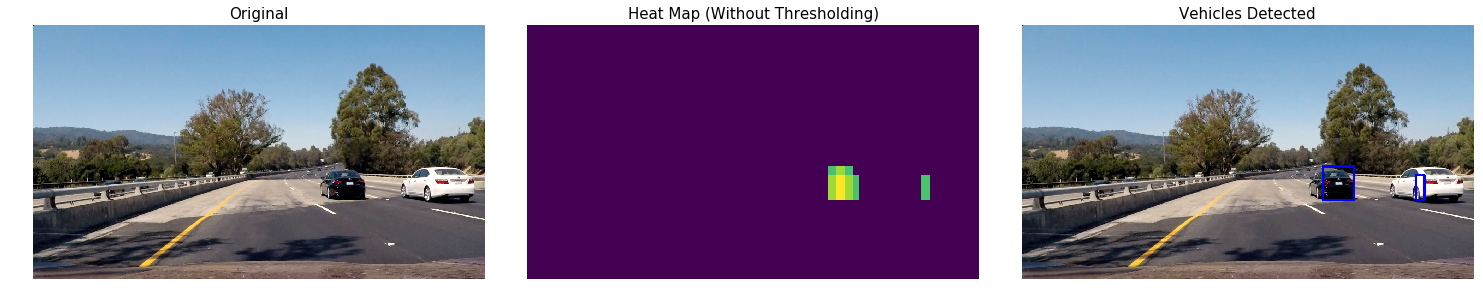

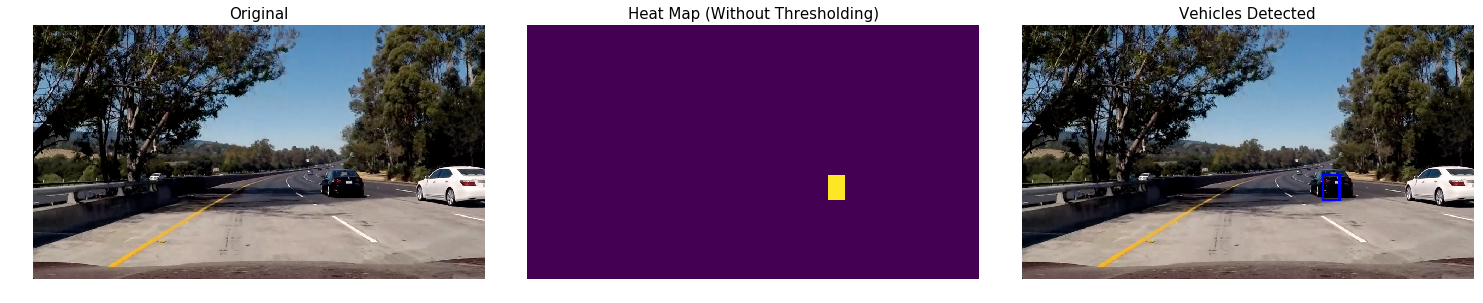

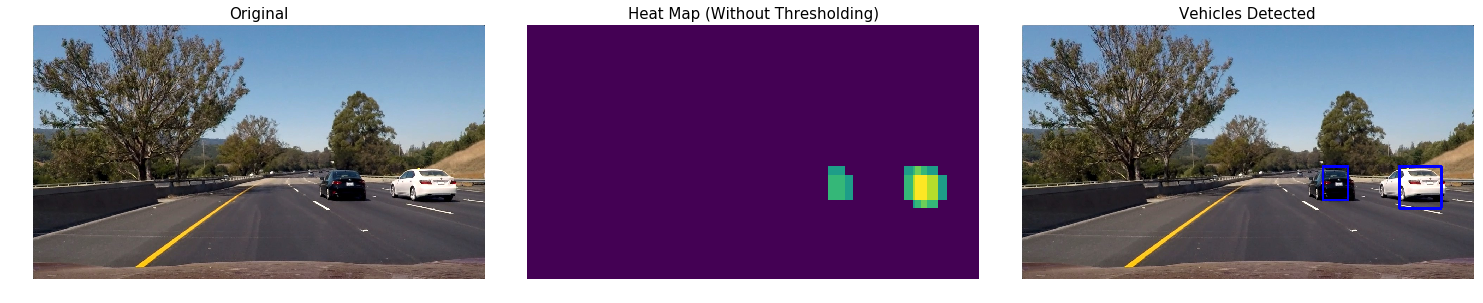

In [5]:
def plot_before_after_images(before_image, inter_image, after_image):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 9))
    f.tight_layout()
    ax1.imshow(before_image)
    ax1.set_title('Original', fontsize=15)
    ax1.axis("off")
    ax2.imshow(inter_image)
    ax2.axis("off")
    ax2.set_title('Heat Map (Without Thresholding)', fontsize=15)
    ax3.imshow(after_image)
    ax3.axis("off")
    ax3.set_title('Vehicles Detected', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

test_images = glob.glob('./test_images/*.jpg')
for each_test_image in test_images:
    cur_image = cv2.cvtColor(cv2.imread(each_test_image), cv2.COLOR_BGR2RGB) 
    heat_map, detect_image = vd_detect.detect_in_images(cur_image)
    plot_before_after_images(cur_image, heat_map, detect_image)


In [4]:
def find_vehicles_in_each_frame(current_image):
    heat_map, detect_image = vd_detect.detect_in_frames(current_image)
    return detect_image

input_file = './project_video.mp4'
output_file = './project_video_output.mp4'
find_vehicles_clip = VideoFileClip(input_file)
vehicles_found_clip = find_vehicles_clip.fl_image(find_vehicles_in_each_frame)
%time vehicles_found_clip.write_videofile(output_file, audio=False)

[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|███████████████████████████████████▉| 1260/1261 [1:01:16<00:02,  2.89s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

Wall time: 1h 1min 17s


## Improvements

* Use deep learning methods for vehicle detection
* Use data augmentation techniques to increase the variablity in the data.
* Reduce the execution time for pipeline
* Study the effect of using PCA for dimesionality reduction on performance